In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("data_new.csv")
data

,Unnamed: 0,Yield,reac1_0,reac1_1,reac1_2,reac1_3,reac1_4,reac1_5,reac1_6,reac1_7,...,preact_90,preact_91,preact_92,preact_93,preact_94,preact_95,preact_96,preact_97,preact_98,preact_99
0,0,95.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,100.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,98.0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,3,78.6,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,4,95.0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24626,24626,62.0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,1
24627,24627,83.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
24628,24628,58.0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
24629,24629,57.6,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0


ML PART

In [6]:
data

,Unnamed: 0,Yield,reac1_0,reac1_1,reac1_2,reac1_3,reac1_4,reac1_5,reac1_6,reac1_7,...,preact_90,preact_91,preact_92,preact_93,preact_94,preact_95,preact_96,preact_97,preact_98,preact_99
0,0,95.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,100.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,98.0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,3,78.6,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,4,95.0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24626,24626,62.0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,1
24627,24627,83.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
24628,24628,58.0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
24629,24629,57.6,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0


In [7]:
from sklearn.model_selection import train_test_split

features = data.columns[2:]
target = "Yield"

xtrain, xtest, ytrain, ytest = train_test_split(data[features], data[target], test_size=0.20, random_state=42)

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import xgboost as xg


xgb_r = xg.XGBRegressor(seed = 42)
xgb_r.fit(xtrain, ytrain)
pred = xgb_r.predict(xtest)

RMSE = mean_squared_error(ytest, pred, squared=False)
R2 = r2_score(ytest, pred)  

print("RMSE: ",RMSE)
print("R2: ",R2)

RMSE:  24.71718871035254
R2:  0.05795146497685433


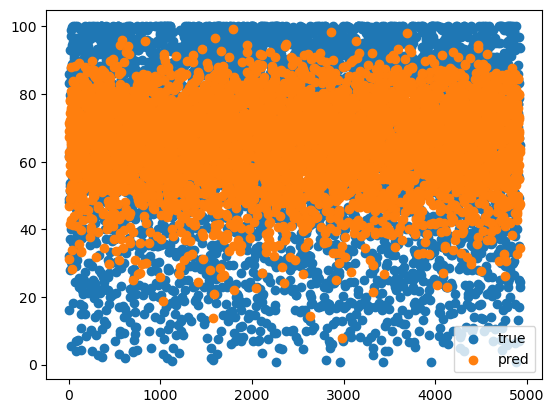

In [10]:
import matplotlib.pyplot as plt


plt.scatter(range(len(ytest)), ytest)
plt.scatter(range(len(pred)), pred)
plt.legend(['true', 'pred'])

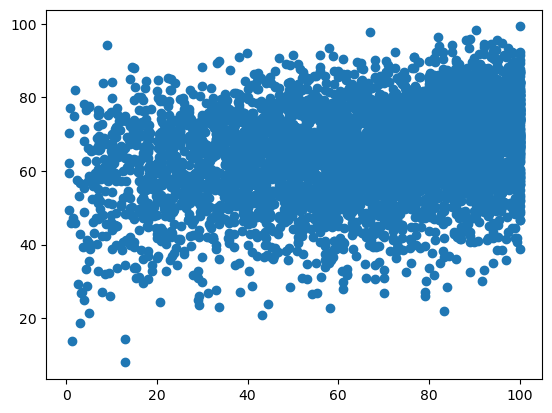

In [11]:
plt.scatter(ytest,pred)